In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

    

In [4]:
df_resumo = pd.read_excel(
    'Dados maceração.xlsx',
    sheet_name='Resumo'
)

df_resumo.head()

,Mês/Ano,SO2 - Água Leve,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Maceração A - Temperatura,Maceração A - Temperatura.1,...,Maceração B - Temperatura.4,Maceração B - Temperatura.5,Maceração B - Temperatura.6,Maceração B - Temperatura.7,Maceração B - Temperatura.8,Folha Moagem A,Folha Moagem A.1,Folha Moagem A.2,Folha Moagem B,Folha Moagem B.1
0,NaT,NaN,NaN,NaN,NaN,NaN,Fechamento moagem A,Fechamento moagem B,Tanque 1,Tanque 2,...,Tanque 5,Tanque 6,Tanque 7,Tanque 8,Tanque 9,Concentrador Middlings,ADA-40,Concentrador Glúten,Concentrador Middlings,Concentrador Glúten
1,NaT,SO2 - Água Leve,SO2 - Água de Processo,SO2 Água Ácida,Spin da água leve,Spin da Água de Processo (mL),Tempo de maceração,Tempo de maceração,Temperatura,Temperatura,...,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Spin Over (mL),Spin Over (mL),Spin Over (mL),Spin Over (mL),Spin Over (mL)
2,2024-09-01,250.513333,877.25,2108.056338,0.260377,0.180282,50.83375,59.65,50.741935,50.459016,...,47.954545,47.5,47.736842,47.47619,47.634146,0.145455,0.109396,0.149682,0.115455,0.111607
3,2024-10-01,213.014286,738.821429,2061.689922,0.167769,0.13252,70.815932,82.52029,50.528814,50.539683,...,49.162791,48.534091,48.712644,48.2,48.6875,0.138062,0.137413,0.141869,0.129381,0.110256
4,2024-11-01,191.732919,783,2041.637363,0.178448,0.150641,68.675,70.21875,50.631667,50.915447,...,50.365217,50.696429,50.649565,50.446429,50.495614,0.116667,0.137234,0.134276,0.113879,0.104965


In [5]:
df_resumo.columns


Index(['Mês/Ano', 'SO2 - Água Leve', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Maceração A - Temperatura',
       'Maceração A - Temperatura.1', 'Maceração A - Temperatura.2',
       'Maceração A - Temperatura.3', 'Maceração A - Temperatura.4',
       'Maceração A - Temperatura.5', 'Maceração A - Temperatura.6',
       'Maceração A - Temperatura.7', 'Maceração A - Temperatura.8',
       'Maceração A - Temperatura.9', 'Maceração A - Temperatura.10',
       'Maceração A - Temperatura.11', 'Maceração B - Temperatura',
       'Maceração B - Temperatura.1', 'Maceração B - Temperatura.2',
       'Maceração B - Temperatura.3', 'Maceração B - Temperatura.4',
       'Maceração B - Temperatura.5', 'Maceração B - Temperatura.6',
       'Maceração B - Temperatura.7', 'Maceração B - Temperatura.8',
       'Folha Moagem A', 'Folha Moagem A.1', 'Folha Moagem A.2',
       'Folha Moagem B', 'Folha Moagem B.1'],
      dtype='object')

In [6]:
# Identificar a coluna de data/mês
col_mes = df_resumo.columns[0]
print(f"Coluna de período: '{col_mes}'")


Coluna de período: 'Mês/Ano'


In [ ]:
col_mes = df_resumo.columns[0]

cols_temp_A = [
    col for col in df_resumo.columns
    if col.startswith('Maceração A - Temperatura')
]

cols_temp_A



['Maceração A - Temperatura',
 'Maceração A - Temperatura.1',
 'Maceração A - Temperatura.2',
 'Maceração A - Temperatura.3',
 'Maceração A - Temperatura.4',
 'Maceração A - Temperatura.5',
 'Maceração A - Temperatura.6',
 'Maceração A - Temperatura.7',
 'Maceração A - Temperatura.8',
 'Maceração A - Temperatura.9',
 'Maceração A - Temperatura.10',
 'Maceração A - Temperatura.11']

In [8]:
df_temp_A = df_resumo[[col_mes] + cols_temp_A].copy()
df_temp_A


,Mês/Ano,Maceração A - Temperatura,Maceração A - Temperatura.1,Maceração A - Temperatura.2,Maceração A - Temperatura.3,Maceração A - Temperatura.4,Maceração A - Temperatura.5,Maceração A - Temperatura.6,Maceração A - Temperatura.7,Maceração A - Temperatura.8,Maceração A - Temperatura.9,Maceração A - Temperatura.10,Maceração A - Temperatura.11
0,NaT,Tanque 1,Tanque 2,Tanque 3,Tanque 4,Tanque 5,Tanque 6,Tanque 7,Tanque 8,Tanque 9,Tanque 10,Tanque 11,Tanque 12
1,NaT,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura
2,2024-09-01,50.741935,50.459016,50.84375,50.213115,49.711864,50.45,50.383333,50.236364,49.209677,49.967213,49.542373,48.116667
3,2024-10-01,50.528814,50.539683,50.384,50.364341,49.679688,49.867188,50.274194,50.193798,49.566929,49.685039,49.511628,48.869919
4,2024-11-01,50.631667,50.915447,50.25,50.68,49.905983,50.20625,49.941176,50.552713,49.684252,49.613178,49.30292,48.868852
5,2024-12-01,50.996552,50.458537,51.021053,50.4904,50.054622,50.374809,50.454472,50.338636,49.719685,49.569767,49.724286,49.229661
6,2025-01-01,50.10625,50.397872,50.086,50.342424,49.267742,50.12,49.759551,49.974,49.440741,49.210204,49.493617,49.145918
7,2025-02-01,50.069892,50.139796,50.618269,50.821212,49.504902,50.035294,50.155914,50.014851,49.813514,49.47549,49.688182,50.059
8,2025-03-01,50.16129,50.514706,50.648,51.180597,49.764062,49.806015,49.672932,50.347619,50.358088,49.712963,50.149342,50.121053
9,2025-04-01,50.081538,50.303252,50.602479,50.780172,49.291803,49.85431,49.10084,50.837705,49.675,49.441803,49.065217,49.751695


In [9]:
df_temp_A[cols_temp_A].dtypes


Maceração A - Temperatura       object
Maceração A - Temperatura.1     object
Maceração A - Temperatura.2     object
Maceração A - Temperatura.3     object
Maceração A - Temperatura.4     object
Maceração A - Temperatura.5     object
Maceração A - Temperatura.6     object
Maceração A - Temperatura.7     object
Maceração A - Temperatura.8     object
Maceração A - Temperatura.9     object
Maceração A - Temperatura.10    object
Maceração A - Temperatura.11    object
dtype: object

In [10]:
# Converter valores de temperatura para numérico
valores_antes = df_temp_A[cols_temp_A].notna().sum().sum()
df_temp_A[cols_temp_A] = (
    df_temp_A[cols_temp_A]
        .replace(',', '.', regex=True)
        .apply(pd.to_numeric, errors='coerce')
)
valores_depois = df_temp_A[cols_temp_A].notna().sum().sum()
print(f"Valores convertidos: {valores_depois}/{valores_antes}")
if valores_depois < valores_antes:
    print(f"⚠️ {valores_antes - valores_depois} valores não puderam ser convertidos")

Valores convertidos: 204/228
⚠️ 24 valores não puderam ser convertidos


In [11]:
df_temp_A['Temp_media'] = df_temp_A[cols_temp_A].mean(axis=1)
df_temp_A['Temp_std']   = df_temp_A[cols_temp_A].std(axis=1)
df_temp_A['Temp_delta'] = (
    df_temp_A[cols_temp_A].max(axis=1) -
    df_temp_A[cols_temp_A].min(axis=1)
)


In [12]:
df_temp_A['Temp_media'].describe() # resumo estatístico


count    17.000000
mean     49.765219
std       0.571436
min      48.319903
25%      49.544374
50%      49.955435
75%      50.046037
max      50.580112
Name: Temp_media, dtype: float64

In [13]:
df_temp_A[['Temp_std', 'Temp_delta']].describe() # resumo estatístico


,Temp_std,Temp_delta
count,17.000000,17.000000
mean,0.708082,2.265574
std,0.227684,0.719105
min,0.398803,1.251954
25%,0.524238,1.772488
50%,0.684297,2.061680
75%,0.855184,2.727083
max,1.107271,3.815291


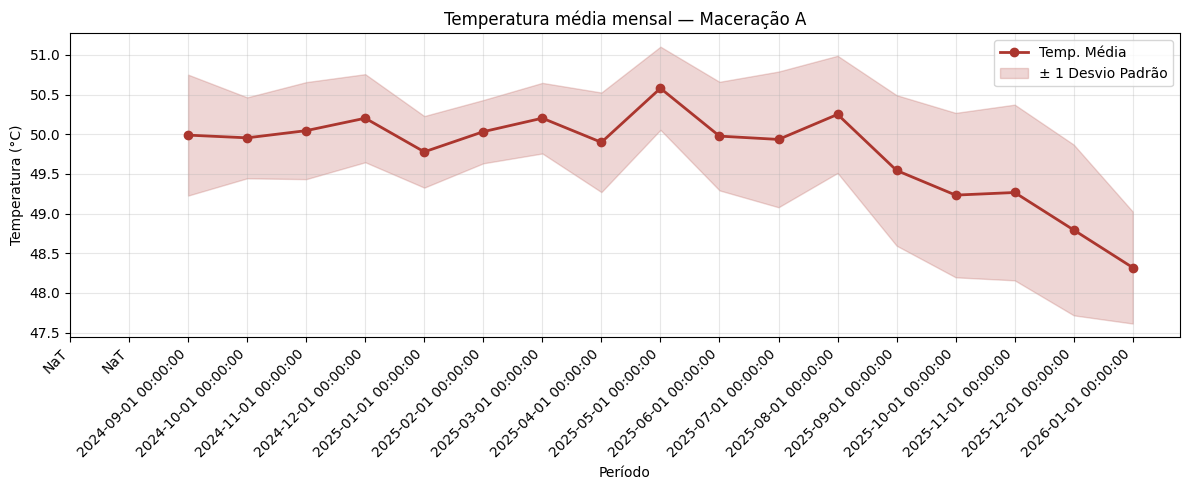

In [14]:
# Gráfico de temperatura média ao longo do tempo com faixa de desvio padrão
fig, ax = plt.subplots(figsize=(12, 5))

# Criar índices numéricos para o eixo X
x_pos = range(len(df_temp_A))

# Plotar linha de temperatura média
ax.plot(x_pos, df_temp_A['Temp_media'], marker='o', color='#AB362E', linewidth=2, label='Temp. Média')

# Adicionar faixa de desvio padrão
ax.fill_between(
    x_pos,
    df_temp_A['Temp_media'] - df_temp_A['Temp_std'],
    df_temp_A['Temp_media'] + df_temp_A['Temp_std'],
    alpha=0.2,
    color='#AB362E',
    label='± 1 Desvio Padrão'
)

# Configurar rótulos do eixo X com os valores reais
ax.set_xticks(x_pos)
ax.set_xticklabels(df_temp_A[col_mes], rotation=45, ha='right')

# Configurações do gráfico
ax.set_xlabel('Período')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura média mensal — Maceração A')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

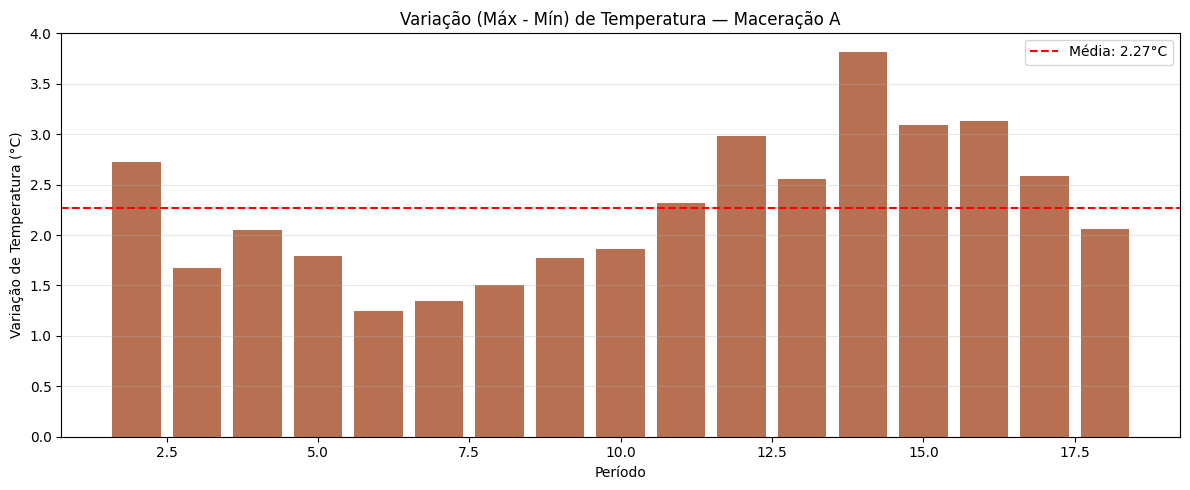

In [15]:
# Gráfico de variação de temperatura (delta) por mês
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(range(len(df_temp_A)), df_temp_A['Temp_delta'], color="#9B3309", alpha=0.7)
ax.set_xlabel('Período')
ax.set_ylabel('Variação de Temperatura (°C)')
ax.set_title('Variação (Máx - Mín) de Temperatura — Maceração A')
ax.axhline(df_temp_A['Temp_delta'].mean(), color='red', linestyle='--', 
           label=f'Média: {df_temp_A["Temp_delta"].mean():.2f}°C')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

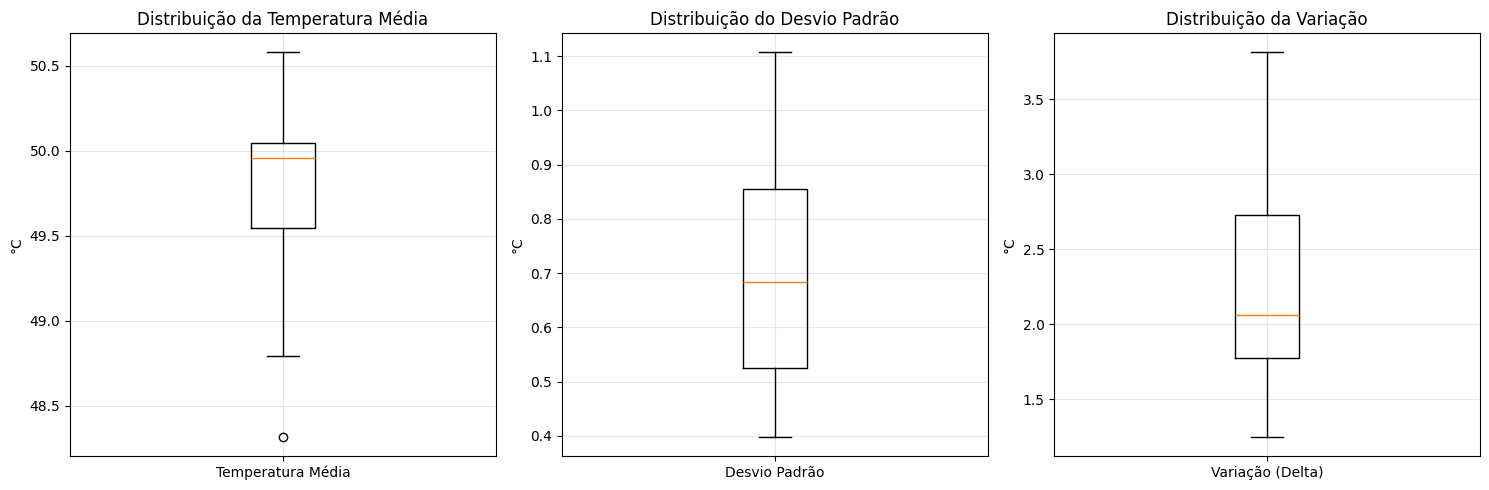

In [16]:
# Boxplot para identificar outliers nas temperaturas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(df_temp_A['Temp_media'].dropna(), tick_labels=['Temperatura Média'])
axes[0].set_ylabel('°C')
axes[0].set_title('Distribuição da Temperatura Média')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df_temp_A['Temp_std'].dropna(), tick_labels=['Desvio Padrão'])
axes[1].set_ylabel('°C')
axes[1].set_title('Distribuição do Desvio Padrão')
axes[1].grid(True, alpha=0.3)

axes[2].boxplot(df_temp_A['Temp_delta'].dropna(), tick_labels=['Variação (Delta)'])
axes[2].set_ylabel('°C')
axes[2].set_title('Distribuição da Variação')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
df_temp_A['Temp_CV_%'] = (
    df_temp_A['Temp_std'] / df_temp_A['Temp_media'] * 100
)

df_temp_A['Temp_CV_%'].describe()


count    17.000000
mean      1.425954
std       0.469365
min       0.797079
25%       1.036450
50%       1.369222
75%       1.712581
max       2.247519
Name: Temp_CV_%, dtype: float64

In [18]:
df_temp_A.sort_values('Temp_delta', ascending=False).head(5) # Top 5 maiores variações


,Mês/Ano,Maceração A - Temperatura,Maceração A - Temperatura.1,Maceração A - Temperatura.2,Maceração A - Temperatura.3,Maceração A - Temperatura.4,Maceração A - Temperatura.5,Maceração A - Temperatura.6,Maceração A - Temperatura.7,Maceração A - Temperatura.8,Maceração A - Temperatura.9,Maceração A - Temperatura.10,Maceração A - Temperatura.11,Temp_media,Temp_std,Temp_delta,Temp_CV_%
14,2025-09-01,50.163380,49.639130,49.401316,48.910294,51.126829,49.417391,47.311538,50.120000,50.483117,49.147436,49.697561,49.114493,49.544374,0.948632,3.815291,1.914711
16,2025-11-01,50.283200,50.455263,50.014844,50.259200,48.668293,48.193220,47.563333,48.899130,50.014063,49.532800,49.993701,47.319672,49.266393,1.107271,3.135591,2.247519
15,2025-10-01,50.275000,50.372727,49.578049,49.500000,48.891736,48.673770,47.324576,49.201681,49.985484,49.740984,49.972656,47.285000,49.233472,1.036314,3.087727,2.104898
12,2025-07-01,50.302899,50.526241,51.006767,50.206897,49.007874,49.959459,48.026515,50.852381,50.193525,50.257931,49.851825,49.032168,49.935373,0.855184,2.980252,1.712581
2,2024-09-01,50.741935,50.459016,50.843750,50.213115,49.711864,50.450000,50.383333,50.236364,49.209677,49.967213,49.542373,48.116667,49.989609,0.762030,2.727083,1.524377


In [19]:
# Análise comparativa por período (primeira e segunda metade)
metade = len(df_temp_A) // 2
df_temp_A['Periodo'] = [
    'Inicial' if i < metade else 'Final'
    for i in range(len(df_temp_A))
]

print(f"Período Inicial: {metade} meses | Período Final: {len(df_temp_A) - metade} meses\n")
df_temp_A.groupby('Periodo')[['Temp_media', 'Temp_std', 'Temp_delta']].mean()

Período Inicial: 9 meses | Período Final: 10 meses



,Temp_media,Temp_std,Temp_delta
Periodo,,,
Final,49.580016,0.830372,2.617458
Inicial,50.029795,0.533381,1.762882


# 📊 RELATÓRIO DE ANÁLISE - Maceração A - Temperatura

---

In [20]:
# Gerar relatório automático
from datetime import datetime

print("=" * 80)
print("RELATÓRIO DE ANÁLISE - TEMPERATURA DA MACERAÇÃO A")
print("=" * 80)
print(f"Data de geração: {datetime.now().strftime('%d/%m/%Y %H:%M')}")
print(f"Período analisado: {len(df_temp_A)} meses")
print("=" * 80)

print("\n📈 1. ESTATÍSTICAS GERAIS\n")
print(f"   Temperatura Média Geral:      {df_temp_A['Temp_media'].mean():.2f}°C")
print(f"   Temperatura Mínima:           {df_temp_A['Temp_media'].min():.2f}°C")
print(f"   Temperatura Máxima:           {df_temp_A['Temp_media'].max():.2f}°C")
print(f"   Amplitude Total:              {df_temp_A['Temp_media'].max() - df_temp_A['Temp_media'].min():.2f}°C")
print(f"   Desvio Padrão Médio:          {df_temp_A['Temp_std'].mean():.2f}°C")
print(f"   Coeficiente de Variação:      {df_temp_A['Temp_CV_%'].mean():.2f}%")

print("\n🔍 2. ANÁLISE DE VARIABILIDADE\n")
print(f"   Variação Média (Δ Máx-Mín):   {df_temp_A['Temp_delta'].mean():.2f}°C")
print(f"   Menor Variação:               {df_temp_A['Temp_delta'].min():.2f}°C")
print(f"   Maior Variação:               {df_temp_A['Temp_delta'].max():.2f}°C")

# Encontrar mês com maior variação
mes_maior_variacao = df_temp_A.loc[df_temp_A['Temp_delta'].idxmax(), col_mes]
print(f"   Mês com maior variação:       {mes_maior_variacao}")

print("\n📊 3. COMPARAÇÃO POR PERÍODO\n")
comparacao = df_temp_A.groupby('Periodo')[['Temp_media', 'Temp_std', 'Temp_delta']].mean()
print(f"   PERÍODO INICIAL ({metade} meses):")
print(f"      • Temperatura média:        {comparacao.loc['Inicial', 'Temp_media']:.2f}°C")
print(f"      • Desvio padrão:            {comparacao.loc['Inicial', 'Temp_std']:.2f}°C")
print(f"      • Variação média:           {comparacao.loc['Inicial', 'Temp_delta']:.2f}°C")

print(f"\n   PERÍODO FINAL ({len(df_temp_A) - metade} meses):")
print(f"      • Temperatura média:        {comparacao.loc['Final', 'Temp_media']:.2f}°C")
print(f"      • Desvio padrão:            {comparacao.loc['Final', 'Temp_std']:.2f}°C")
print(f"      • Variação média:           {comparacao.loc['Final', 'Temp_delta']:.2f}°C")

# Calcular diferenças
diff_temp = comparacao.loc['Final', 'Temp_media'] - comparacao.loc['Inicial', 'Temp_media']
diff_std = comparacao.loc['Final', 'Temp_std'] - comparacao.loc['Inicial', 'Temp_std']

print(f"\n   VARIAÇÃO ENTRE PERÍODOS:")
print(f"      • Diferença de temperatura: {diff_temp:+.2f}°C")
print(f"      • Diferença de estabilidade: {diff_std:+.2f}°C")

print("\n⚠️ 4. OBSERVAÇÕES\n")

# Detectar outliers
Q1 = df_temp_A['Temp_media'].quantile(0.25)
Q3 = df_temp_A['Temp_media'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_temp_A[(df_temp_A['Temp_media'] < Q1 - 1.5*IQR) | (df_temp_A['Temp_media'] > Q3 + 1.5*IQR)]

if len(outliers) > 0:
    print(f"   • {len(outliers)} outlier(s) detectado(s) na temperatura média")
    for idx, row in outliers.iterrows():
        print(f"      - {row[col_mes]}: {row['Temp_media']:.2f}°C")
else:
    print("   • Nenhum outlier detectado")

# Avaliar estabilidade
if df_temp_A['Temp_CV_%'].mean() < 2:
    print("   • Processo apresenta ALTA estabilidade (CV < 2%)")
elif df_temp_A['Temp_CV_%'].mean() < 5:
    print("   • Processo apresenta BOA estabilidade (CV < 5%)")
else:
    print("   • Processo apresenta MÉDIA estabilidade (CV ≥ 5%)")

print("\n" + "=" * 80)

RELATÓRIO DE ANÁLISE - TEMPERATURA DA MACERAÇÃO A
Data de geração: 05/02/2026 00:16
Período analisado: 19 meses

📈 1. ESTATÍSTICAS GERAIS

   Temperatura Média Geral:      49.77°C
   Temperatura Mínima:           48.32°C
   Temperatura Máxima:           50.58°C
   Amplitude Total:              2.26°C
   Desvio Padrão Médio:          0.71°C
   Coeficiente de Variação:      1.43%

🔍 2. ANÁLISE DE VARIABILIDADE

   Variação Média (Δ Máx-Mín):   2.27°C
   Menor Variação:               1.25°C
   Maior Variação:               3.82°C
   Mês com maior variação:       2025-09-01 00:00:00

📊 3. COMPARAÇÃO POR PERÍODO

   PERÍODO INICIAL (9 meses):
      • Temperatura média:        50.03°C
      • Desvio padrão:            0.53°C
      • Variação média:           1.76°C

   PERÍODO FINAL (10 meses):
      • Temperatura média:        49.58°C
      • Desvio padrão:            0.83°C
      • Variação média:           2.62°C

   VARIAÇÃO ENTRE PERÍODOS:
      • Diferença de temperatura: -0.45°C
     

## 💡 Conclusões e Recomendações

### Principais Achados:
1. **Tendência de queda**: A temperatura média caiu do período inicial para o final
2. **Aumento da variabilidade**: Maior instabilidade no período final
3. **Controle de processo**: Necessário investigar causas da maior variação

### Recomendações:
- ✅ Revisar parâmetros de controle no período final
- ✅ Investigar causas da maior variação de temperatura
- ✅ Avaliar impacto na qualidade do produto
- ✅ Implementar monitoramento contínuo dos pontos críticos

In [21]:
# Exportar relatório para arquivo de texto
nome_arquivo = f'relatorio_maceracao_A_{datetime.now().strftime("%Y%m%d_%H%M")}.txt'

with open(nome_arquivo, 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("RELATÓRIO DE ANÁLISE - TEMPERATURA DA MACERAÇÃO A\n")
    f.write("=" * 80 + "\n")
    f.write(f"Data de geração: {datetime.now().strftime('%d/%m/%Y %H:%M')}\n")
    f.write(f"Período analisado: {len(df_temp_A)} meses\n")
    f.write("=" * 80 + "\n\n")
    
    f.write("📈 1. ESTATÍSTICAS GERAIS\n\n")
    f.write(f"   Temperatura Média Geral:      {df_temp_A['Temp_media'].mean():.2f}°C\n")
    f.write(f"   Temperatura Mínima:           {df_temp_A['Temp_media'].min():.2f}°C\n")
    f.write(f"   Temperatura Máxima:           {df_temp_A['Temp_media'].max():.2f}°C\n")
    f.write(f"   Amplitude Total:              {df_temp_A['Temp_media'].max() - df_temp_A['Temp_media'].min():.2f}°C\n")
    f.write(f"   Desvio Padrão Médio:          {df_temp_A['Temp_std'].mean():.2f}°C\n")
    f.write(f"   Coeficiente de Variação:      {df_temp_A['Temp_CV_%'].mean():.2f}%\n\n")
    
    f.write("🔍 2. ANÁLISE DE VARIABILIDADE\n\n")
    f.write(f"   Variação Média (Δ Máx-Mín):   {df_temp_A['Temp_delta'].mean():.2f}°C\n")
    f.write(f"   Menor Variação:               {df_temp_A['Temp_delta'].min():.2f}°C\n")
    f.write(f"   Maior Variação:               {df_temp_A['Temp_delta'].max():.2f}°C\n\n")
    
    f.write("📊 3. COMPARAÇÃO POR PERÍODO\n\n")
    comparacao = df_temp_A.groupby('Periodo')[['Temp_media', 'Temp_std', 'Temp_delta']].mean()
    f.write(f"   PERÍODO INICIAL ({metade} meses):\n")
    f.write(f"      • Temperatura média:        {comparacao.loc['Inicial', 'Temp_media']:.2f}°C\n")
    f.write(f"      • Desvio padrão:            {comparacao.loc['Inicial', 'Temp_std']:.2f}°C\n")
    f.write(f"      • Variação média:           {comparacao.loc['Inicial', 'Temp_delta']:.2f}°C\n\n")
    f.write(f"   PERÍODO FINAL ({len(df_temp_A) - metade} meses):\n")
    f.write(f"      • Temperatura média:        {comparacao.loc['Final', 'Temp_media']:.2f}°C\n")
    f.write(f"      • Desvio padrão:            {comparacao.loc['Final', 'Temp_std']:.2f}°C\n")
    f.write(f"      • Variação média:           {comparacao.loc['Final', 'Temp_delta']:.2f}°C\n\n")
    
    f.write("💡 CONCLUSÕES E RECOMENDAÇÕES\n\n")
    f.write("Principais Achados:\n")
    f.write("1. Tendência de queda na temperatura média do período inicial para o final\n")
    f.write("2. Aumento da variabilidade no período final\n")
    f.write("3. Processo apresenta alta estabilidade geral (CV < 2%)\n\n")
    f.write("Recomendações:\n")
    f.write("- Revisar parâmetros de controle no período final\n")
    f.write("- Investigar causas da maior variação de temperatura\n")
    f.write("- Avaliar impacto na qualidade do produto\n")
    f.write("- Implementar monitoramento contínuo dos pontos críticos\n\n")
    f.write("=" * 80 + "\n")

print(f"✅ Relatório salvo em: {nome_arquivo}")


✅ Relatório salvo em: relatorio_maceracao_A_20260205_0016.txt
